# Development of an AI Classification Model for Detecting Jamming

We want to develop an AI model to detect jamming. To do that we decided to go with the fastai deep learning library, using the fastai computer vision. More information about fastai can be found here https://docs.fast.ai/ 

In [ ]:
!pip install fastai -U

In [ ]:
from fastai.vision.all import *

To use the data from google drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We also need the path for our images that our model can train on:

In [ ]:
path = Path('/content/drive/MyDrive/images/train')

Our current model

In [ ]:
def is_jam(x): return (x.find("no") == -1)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_jam)

learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(5, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.622823,0.295730,0.089337,03:58


epoch,train_loss,valid_loss,error_rate,time
0,0.239278,0.122840,0.043228,00:39
1,0.157197,0.096559,0.037464,00:38
2,0.051768,0.061585,0.023055,00:38


Our model so far seems good, with an error rate at 2% However we need to find out where our model does best, for now we just used fastai default settings.

In [ ]:
def is_jam(x): return (x.find("no") == -1)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_jam)

TypeError: ignored

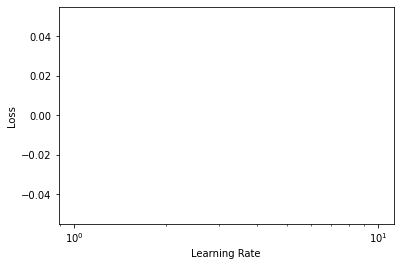

In [ ]:
lr_min,lr_steep = learn.lr_find()

The course adviced to pick:

*   One order of magnitude less than where the minimum loss was achieved (i.e., the minimum divided by 10)
*   The last point where the loss was clearly decreasing



Try min

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 4.79e-05, steepest point: 6.31e-07


In [ ]:
learn.fine_tune(3, base_lr=4.79e-05)

epoch,train_loss,valid_loss,error_rate,time
0,0.054675,0.049826,0.014409,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.047966,0.045858,0.008646,00:15
1,0.044727,0.044112,0.008646,00:15
2,0.048224,0.048421,0.011527,00:15


This was the quickest way to train a model finishing alot faster, the time also depends on which gpu is assigned whenever you open a session on colab you might get a different one. You can check current gpu by using: 

In [ ]:
!nvidia-smi

Wed May 12 10:06:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Minimum/10: 1.74e-02, steepest point: 6.31e-07


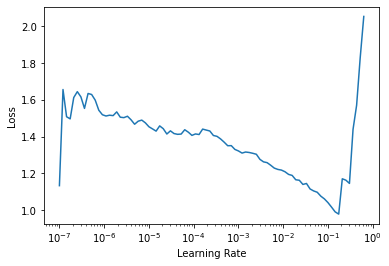

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fine_tune(5, base_lr=1.74e-02)

epoch,train_loss,valid_loss,error_rate,time
0,0.432550,0.310787,0.051873,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.309179,0.201463,0.060519,00:18
1,0.306566,0.171971,0.046110,00:18
2,0.200750,0.060902,0.020173,00:18
3,0.073466,0.036114,0.020173,00:18
4,0.039367,0.029275,0.011527,00:18


Resnet50

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Minimum/10: 1.45e-02, steepest point: 6.31e-03


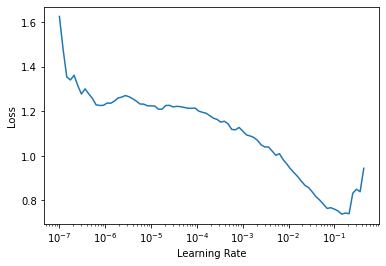

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fine_tune(5, base_lr=1.45e-02)

epoch,train_loss,valid_loss,error_rate,time
0,0.635543,0.133384,0.048991,01:28


epoch,train_loss,valid_loss,error_rate,time
0,0.157789,0.223555,0.057637,00:27
1,0.120385,3.110557,0.414986,00:26
2,0.101181,0.026347,0.005764,00:26
3,0.074399,0.021746,0.011527,00:26
4,0.053778,0.008440,0.000000,00:26


In [ ]:
learn.fine_tune(5, base_lr=3e-03)

epoch,train_loss,valid_loss,error_rate,time
0,0.013953,0.003210,0.000000,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.015061,0.006646,0.002882,00:26
1,0.011935,0.007105,0.005764,00:27
2,0.029717,0.025468,0.008646,00:27
3,0.024011,0.005516,0.002882,00:27
4,0.016189,0.005627,0.002882,00:27


Resnet101

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


Minimum/10: 8.32e-03, steepest point: 1.10e-06


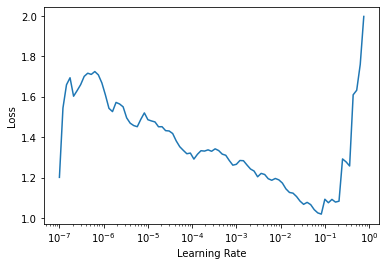

In [ ]:
learn = cnn_learner(dls, resnet101, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fine_tune(5, base_lr=8.32e-03)

epoch,train_loss,valid_loss,error_rate,time
0,0.427696,0.653705,0.057637,00:39


epoch,train_loss,valid_loss,error_rate,time
0,0.222865,0.149137,0.034582,00:51
1,0.203637,0.026571,0.002882,00:51
2,0.185777,0.060091,0.014409,00:51
3,0.095392,0.014820,0.002882,00:51
4,0.065038,0.011404,0.002882,00:51


Resnet152

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


Minimum/10: 1.20e-02, steepest point: 1.58e-04


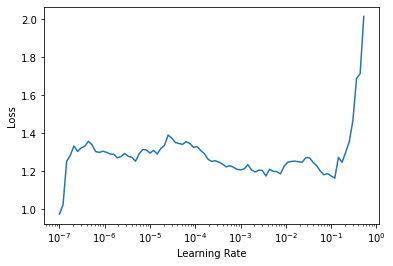

In [ ]:
learn = cnn_learner(dls, resnet152, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fine_tune(5, base_lr=1.20e-02)

epoch,train_loss,valid_loss,error_rate,time
0,0.365091,0.284767,0.066282,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.345841,0.120392,0.034582,01:13
1,0.253586,1.047362,0.112392,01:13
2,0.309274,0.460163,0.057637,01:13
3,0.150709,0.033279,0.017291,01:13
4,0.061061,0.022066,0.011527,01:13


Other stuff

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


Minimum/10: 1.74e-02, steepest point: 2.29e-06


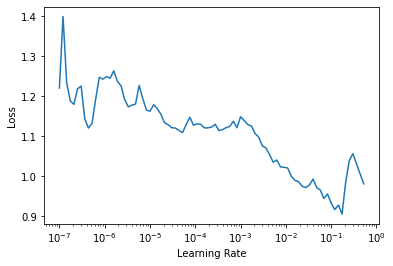

In [ ]:
learn = cnn_learner(dls, alexnet, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fine_tune(5, base_lr=1.74e-02)

epoch,train_loss,valid_loss,error_rate,time
0,0.482942,49.504688,0.069164,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.396441,0.658202,0.034582,00:07
1,0.275447,69.854919,0.080692,00:07
2,0.215155,1.342618,0.051873,00:07
3,0.090821,48.710815,0.023055,00:07
4,0.068087,272.632507,0.023055,00:07


vgg16

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


Minimum/10: 1.74e-02, steepest point: 1.32e-06


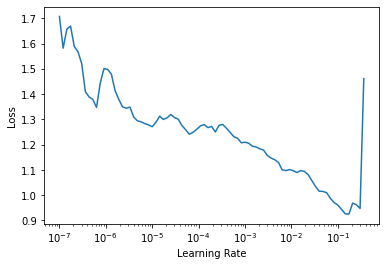

In [ ]:
learn = cnn_learner(dls, vgg16_bn, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fine_tune(5, base_lr=1.74e-02)

epoch,train_loss,valid_loss,error_rate,time
0,0.346867,0.308176,0.034582,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.307164,0.090733,0.014409,00:49
1,0.529739,0.142262,0.025937,00:49
2,0.270485,0.064213,0.014409,00:48
3,0.130711,0.133908,0.025937,00:48
4,0.088934,0.030989,0.011527,00:48


vgg19

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


Minimum/10: 1.45e-02, steepest point: 9.12e-07


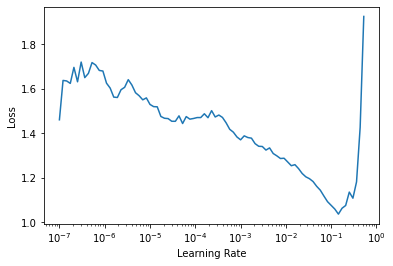

In [ ]:
learn = cnn_learner(dls, vgg19_bn, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fine_tune(5, base_lr=1.45e-02)

epoch,train_loss,valid_loss,error_rate,time
0,0.409699,0.171741,0.043228,00:44


epoch,train_loss,valid_loss,error_rate,time
0,0.327954,0.246494,0.066282,00:56
1,0.417118,0.235063,0.069164,00:56
2,0.231158,0.117028,0.046110,00:56
3,0.169750,0.063397,0.025937,00:56
4,0.060999,0.050700,0.023055,00:56


densenet

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


Minimum/10: 3.02e-02, steepest point: 3.31e-06


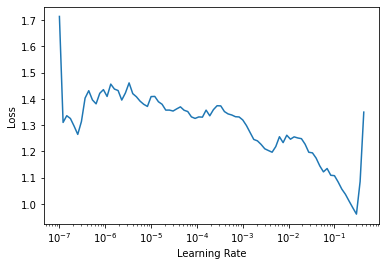

In [ ]:
learn = cnn_learner(dls, densenet161, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fine_tune(5, base_lr=3.02e-02)

epoch,train_loss,valid_loss,error_rate,time
0,0.530097,1.768897,0.126801,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.369586,0.178883,0.017291,01:08
1,0.603307,1.132484,0.060519,01:07
2,0.374023,0.072545,0.017291,01:07
3,0.132385,0.052981,0.005764,01:07
4,0.063678,0.035115,0.005764,01:06


ResNet50 with 10 epochs

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(10, base_lr=1.20e-02)

epoch,train_loss,valid_loss,error_rate,time
0,0.364496,0.250115,0.034582,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.202384,0.130007,0.034582,01:07
1,0.238004,0.179022,0.037464,01:06
2,0.223102,0.465038,0.106628,01:06
3,0.265271,0.056232,0.020173,01:06
4,0.165563,0.035112,0.008646,01:06
5,0.110305,0.016347,0.002882,01:06
6,0.095059,0.015931,0.005764,01:06
7,0.043419,0.031261,0.011527,01:06
8,0.039108,0.038774,0.008646,01:06
9,0.054478,0.045717,0.008646,01:06


ResNet 101 with 10 epochs

In [ ]:
learn = cnn_learner(dls, resnet101, metrics=error_rate)
learn.fine_tune(10, base_lr=8.32e-03)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.405314,0.801084,0.060519,01:25


epoch,train_loss,valid_loss,error_rate,time
0,0.228968,0.145650,0.057637,01:50
1,0.175859,0.158900,0.051873,01:50
2,0.210062,0.067957,0.028818,01:50
3,0.145491,0.056162,0.020173,01:50
4,0.131688,0.018046,0.008646,01:50
5,0.126869,0.093134,0.028818,01:50
6,0.056693,0.012668,0.005764,01:50
7,0.031231,0.037546,0.011527,01:50
8,0.015236,0.019866,0.005764,01:50
9,0.014744,0.027089,0.005764,01:50


Densenet with 10 epochs

In [ ]:
learn = cnn_learner(dls, densenet161, metrics=error_rate)
learn.fine_tune(10, base_lr=3.02e-02)

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.415860,0.672728,0.066282,02:13


epoch,train_loss,valid_loss,error_rate,time
0,0.240691,0.051835,0.014409,02:29
1,0.274721,6.901240,0.590778,02:26
2,0.487584,0.213213,0.034582,02:27
3,0.494370,0.395768,0.072046,02:27
4,0.181302,0.142777,0.020173,02:27
5,0.124229,0.290192,0.037464,02:27
6,0.093216,0.050606,0.014409,02:27


Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, b

KeyboardInterrupt: ignored

Minimum/10: 1.74e-02, steepest point: 2.75e-06


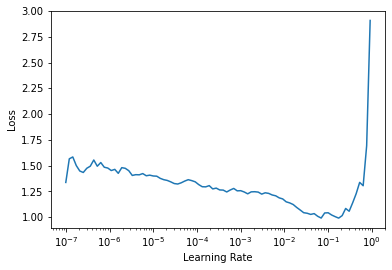

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fit_one_cycle(3, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,1.000290,0.545857,0.259366,00:52
1,0.838014,0.441488,0.193084,00:52
2,0.724820,0.378904,0.152738,00:52


In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=8.31763736641733e-07, lr_steep=2.75422871709452e-06)

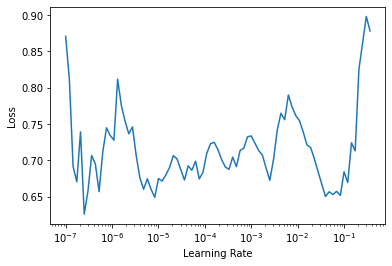

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max=1e-7)

epoch,train_loss,valid_loss,error_rate,time
0,0.632041,0.338522,0.121037,01:07
1,0.623961,0.376711,0.144092,01:07
2,0.635680,0.301775,0.103746,01:07
3,0.666508,0.427382,0.158501,01:07
4,0.657152,0.310988,0.115274,01:07
5,0.662360,0.332067,0.118156,01:07


In [ ]:
learn = cnn_learner(dls, resnet101, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn = cnn_learner(dls, densenet161, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.74e-02, steepest point: 1.58e-06


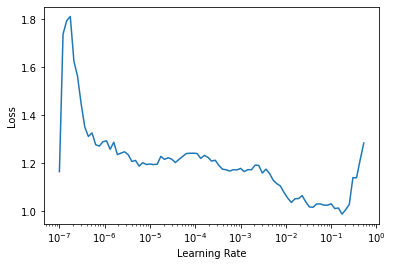

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fine_tune(5, base_lr=1.74e-02)

epoch,train_loss,valid_loss,error_rate,time
0,0.490934,0.439471,0.043228,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.301981,0.149857,0.028818,01:07
1,0.389294,0.445333,0.121037,01:07
2,0.335763,0.188095,0.051873,01:07
3,0.160200,0.061209,0.023055,01:07
4,0.092546,0.029244,0.011527,01:07


In [ ]:
from fastai.vision import *
from fastai.widgets import ClassConfusion

ModuleNotFoundError: ignored

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

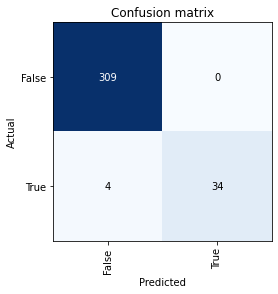

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
learn.metrics=[accuracy,
               Precision(),
               Recall(),
               F1Score()]

In [ ]:
learn.fine_tune(5, base_lr=1.74e-02)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.123689,0.036405,0.994236,1.000000,0.947368,0.972973,00:54


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.105079,4.308465,0.812680,0.357895,0.894737,0.511278,01:07
1,0.225714,0.172917,0.959654,0.750000,0.947368,0.837209,01:07
2,0.084512,0.030500,0.997118,1.000000,0.973684,0.986667,01:07
3,0.050606,0.062466,0.994236,1.000000,0.947368,0.972973,01:07
4,0.023940,0.061970,0.991354,1.000000,0.921053,0.958904,01:07


In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

# Our model and how it works

First we install and import our fastai library dependencies

In [ ]:
!pip install fastai -U
from fastai.vision.all import *

Then we make a path object from where our images are located

In [ ]:
path = Path('/content/drive/MyDrive/images')

We need to create a label for which our jamming files predicts jamming

In [ ]:
def is_jam(x): return (x.find("no") == -1)

Our image files looks like '10_jam.png' or '13_nojam.png' for jamming and no jamming respectively. We then create a Dataloaders object:

In [ ]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_jam, bs=12)

Dataloaders allows us to train models but we need to tell fastai four things atleast: 

1.   What type of data we are working with
2.   How to get the list of items
3.   How to label them
4.   How to create a validation set

We can then put it into a learner:

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

resnet is an architecture which is already has already pretrained on other images from ImageNet, which is highly useful for our kind of work. The number after resnet means how many layers.

In [ ]:
learn.fine_tune(3)

fine_tune(x) is a transfer learning technique where the parameters of a pretrained model are updated by training for additional epochs using a different task to that used for pretraining. An epoch is one pass through the dataset.

We can then use learn.predict()

# For testing purposes

In [ ]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img

NameError: ignored

In [ ]:
img = PILImage.create(uploader.data[0])
is_jam,_,probs = learn.predict(img)
print(f"Jamming?: {is_jam}.")
print(f"Probability: {probs[1].item():.4f}")

Jamming?: True.
Probability: 1.0000
